## BBC News Classification

### Introduction

BBC News Text Classification refers to the process of categorizing news articles published by the British Broadcasting Corporation (BBC) into different predefined categories or topics. This classification task is essential for organizing and managing large volumes of news content, enabling efficient retrieval and recommendation systems, and providing users with a better browsing experience.

Text classification is a subfield of natural language processing (NLP) that involves training machine learning models to automatically assign predefined labels or categories to text documents based on their content. In the case of BBC News, the goal is to classify articles into various topics such as politics, sports, entertainment, technology, health, and more.

### Objectives 

The project aims to develop a machine learning model that can accurately classify news articles from the BBC into different categories such as sports, politics, entertainment, technology, and more.

### About the Dataset

The BBC [dataset](https://drive.google.com/file/view?usp=sharing) contains 2225 examples of news articles with their respective labels.

Specifically, the project will involve:

1. Data Collection: Gathering comprehensive dataset of news articles from the BBC across various categories. This dataset will serve as the foundation for training and evaluating the machine learning model.

2. Preprocessing: Cleaning and preprocessing the collected data to remove noise, irrelevant information, and standardize the text format. This step will involve tasks such as tokenization, stop-word removal, stemming or lemmatization, and handling special characters or punctuation.

3. Feature Extraction: Extracting meaningful features from the preprocessed text data that can effectively represent the content of each news article. Common techniques for feature extraction in text classification include bag-of-words representation, TF-IDF (Term Frequency-Inverse Document Frequency), word embeddings (e.g., Word2Vec or GloVe), or more advanced techniques.

4. Model Selection: Exploring and evaluating different machine learning algorithms suitable for text classification tasks. This will include using LSTM and Logistic Regression Model.

5. Model Training and Evaluation: Training the selected machine learning model using the preprocessed data and evaluating its performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score. This step may involve techniques like cross-validation to ensure the model's generalizability.

### Data Collection

The dataset was extracted from [kaggle](https://www.kaggle.com/competitions/learn-ai-bbc/data) containing 2225 examples of news articles with their respective labels.

In [4]:
#importing required Libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [5]:
#store the data into a data frame
data = pd.read_csv("bbc-text.csv")

In [6]:
# Reading the dataset of the first 15 columns
data.head(15)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [7]:
# Reading the dataset of the last 15 columns
data.tail(15)

,category,text
2210,politics,teens know little of politics teenagers ques...
2211,entertainment,lopez misses uk charity premiere jennifer lope...
2212,business,christmas shoppers flock to tills shops all ov...
2213,tech,progress on new internet domains by early 2005...
2214,business,bush budget seeks deep cutbacks president bush...
2215,tech,junk e-mails on relentless rise spam traffic i...
2216,entertainment,top stars join us tsunami tv show brad pitt r...
2217,tech,rings of steel combat net attacks gambling is ...
2218,sport,davies favours gloucester future wales hooker ...
2219,business,beijingers fume over parking fees choking traf...


 ### DATA Preprocessing

In [8]:
#Check the size of the dataset
print(data.shape)

(2225, 2)


In [10]:
# check for missing values
data.isnull().sum()

category    0
text        0
dtype: int64

#### Inference

We can see that no missing values.

In [11]:
# Checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### Inference

We can see that there are 2225 entries (all with zero null counts) with 2 columns.

In [12]:
# checking for the first 10 dataset
data.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [13]:
# checking for the last 10 dataset
data.tail(10)

,category,text
2215,tech,junk e-mails on relentless rise spam traffic i...
2216,entertainment,top stars join us tsunami tv show brad pitt r...
2217,tech,rings of steel combat net attacks gambling is ...
2218,sport,davies favours gloucester future wales hooker ...
2219,business,beijingers fume over parking fees choking traf...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [14]:
# checking the data types
data.dtypes

category    object
text        object
dtype: object

In [15]:
# value counts for category feature
data['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

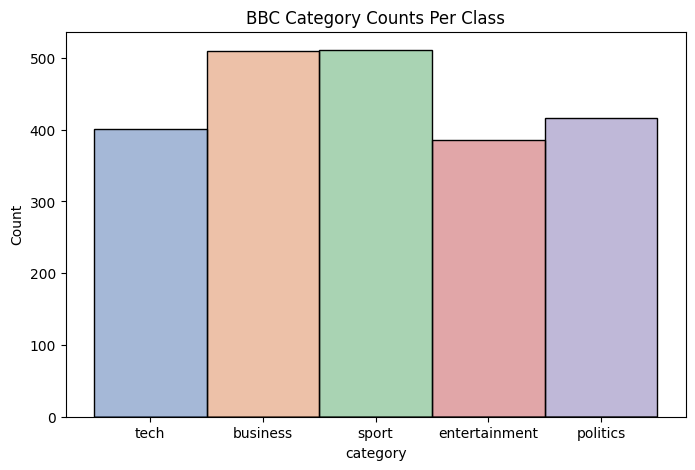

In [16]:
# Creating a histogram of BBC category counts per class 
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data = data,
    x = 'category',
    hue = 'category',
    palette = 'deep',
    legend = False,
    ).set(
        title = 'BBC Category Counts Per Class');

#### Inference 

The histogram plot shows the distribution of articles in each category (Tech, Business, Sport Entertainment and Politics). Sport and Business has the largest distribution of articles while Entertainment has the lowest. Notwithstanding, the number of articles per class is roughly balanced, which is also very great!

In [17]:
# a review of the summary statistics
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


#### What is the structure of the dataset?

There are 2225 entries of BBC news articles with 2 features. Both variables are categorical in nature.

Category: represents 5 Class Labels  (business, entertainment, politics, sport, tech)

Text: Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.


*NOTE*

We can see that the data may have been preprocessed a bit because there are no uppercase characters in the text. Since the dataset belongs to the BBC news articles, it would be safe to assume that there are no spelling mistakes. Capitalization and spelling are two important factors when it comes to natural language processing, hence the pre-processing helps.

## Feature Extraction 

While working with text data, the text needs to be preprocessed so that we can feed it to the classification algorithm. Here we will transform the text by;

1. Removing all special characters 

2. Removing stop words 

3. Lowercasing all the words 

4. Tokenize

5. Lemmatize

In [18]:
# Import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


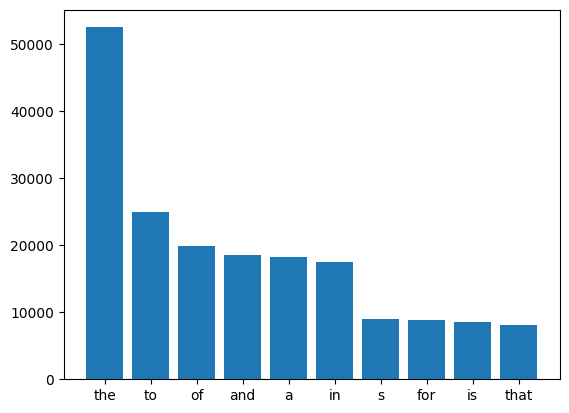

In [19]:
# visualize the number of stop words present in our dataset

def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(data['text'])

In [20]:
# creating a list text
# the text data is extracted from data and stored in a list called text.

text = list(data['text'])

In [21]:
# preprocessing loop
# Within the loop, regular expressions are used to remove any non-alphabetic characters, 
# the text is converted to lowercase, and then split into individual words.

import re

from nltk.stem import WordNetLemmatizer

# lemmatizing each word (reduced to its base form) using the WordNetLemmatizer from nltk
lemmatizer = WordNetLemmatizer()

In [22]:
# joining the preprocessed text back together into a string and adding to a new list called corpus

corpus = []

for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)

In [23]:
#assign corpus to data['text']
# the text has been preprocessed, corpus is assigned to data['text'] 

data['text'] = corpus

# printing the updated data data.head()
data.head()

,category,text
0,tech,tv future hand viewer home theatre system plas...
1,business,worldcom bos left book alone former worldcom b...
2,sport,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raid box office ocean twelve crim...


### Train-test-split

In [24]:
# Creating a Feature and category sets for a machine learning model
# The feature set is stored in the variable X and the category set is stored in the variable y

X = data['text']

y = data['category']

In [25]:
# train test split (65% train - 35% test)
# using the train_test_split function from the sklearn.model_selection module to split the data into 
# training and testing sets.

from sklearn.model_selection import train_test_split


# 35% of the data will be used for testing and 65% will be used for training.
# random_state parameter set at 123 to ensure that the same random split is used each time the code is run.

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.35, random_state=42)


# printing the shape of the training and testing data sets using the shape attribute.
print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (1446,)
Testing Data :  (779,)


#### Inference

The "Training Data" array has a shape of (1446), meaning it has 1446 elements in a single dimension. The "Testing Data" array has a shape of (779), meaning it has 779 elements in a single dimension. 

what this means is that, out of 2225 BBC entries of BBC news articles, the test_size parameter is set to 0.35, which means that 35% (779) of the data will be used for testing and 65% (1446) will be used for training.

In order to train the machine learning model, we employ the Bag of Words model (CountVectorizer) to transform the preprocessed text into numerical features. This process is essential for extracting meaningful information from the text data.

In [26]:
# Training Bag of Words model


# importing necessary libary from sklearn feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

# an instance of the CountVectorizer class is created with the line cv = CountVectorizer().
# This instance is used to transform the text data into a matrix of token counts.
cv = CountVectorizer()

# calling the fit_transform() method of the CountVectorizer instance on the training data
X_train_cv = cv.fit_transform(X_train)

# printing the shape of the resulting matrix
X_train_cv.shape

(1446, 20534)

#### Inference

The line outputs the number of rows and columns in the matrix above, corresponds to the number of training examples and the number of unique tokens in the BBC news vocabulary, respectively.

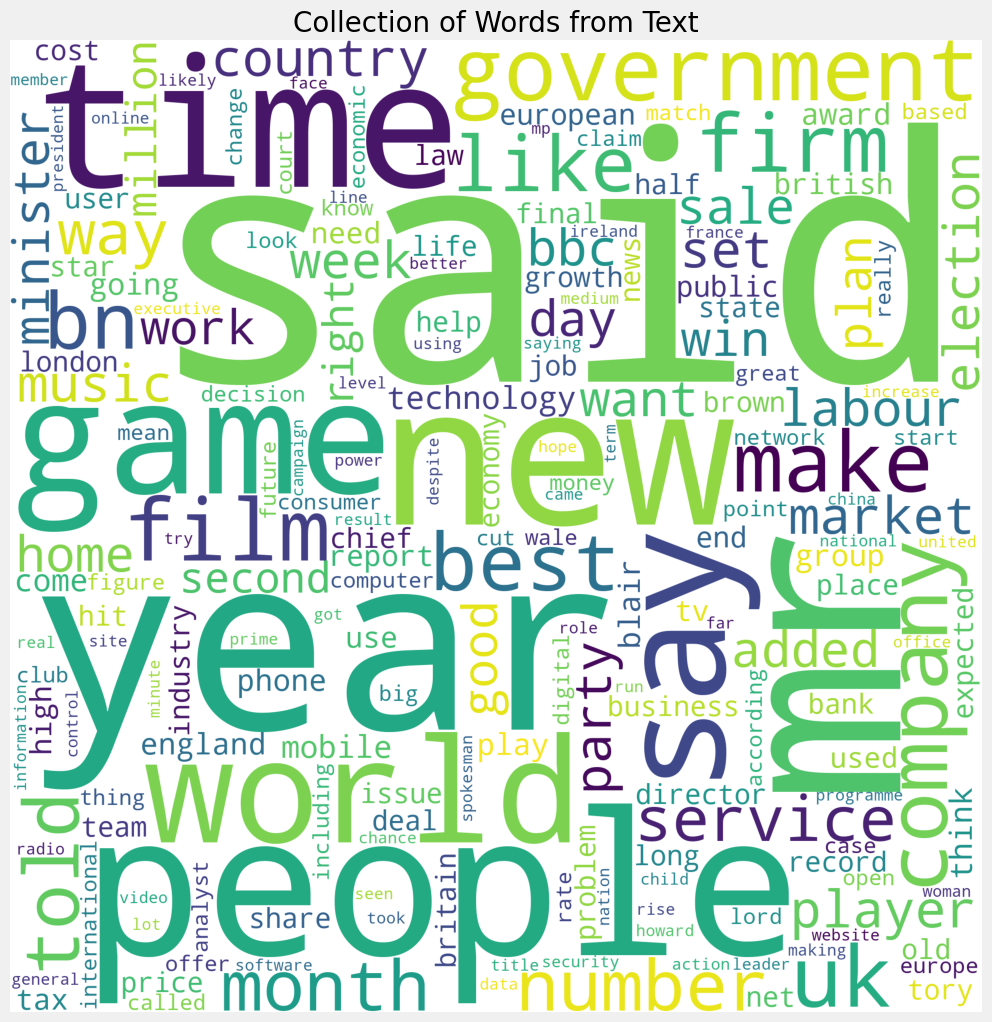

In [54]:
# generating word cloud visualization of the BBC News data 

# import libary
from wordcloud import WordCloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['text'])
all_words = words.sum(axis=0)

freq_words = [(word, all_words[0, idx]) for word, idx in cv.vocabulary_.items()]
freq_words = sorted(freq_words, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'white', width = 2000, height = 2000).generate_from_frequencies(dict(freq_words))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Collection of Words from Text", fontsize = 20)

# displaying the word cloud
plt.show()

#### Inference

The wordcloud outputs shows the fequently vocabulary used in the various Categories of BBC News articles

## Model Selection

#### Model 1 - LSTM 

In [55]:
# having balanced class
sum_categories = 45000
shuffled = data.reindex(np.random.permutation(data.index))
sport    = shuffled[shuffled['category'] == 'sport'][:sum_categories]
business = shuffled[shuffled['category'] == 'business'][:sum_categories]
politics = shuffled[shuffled['category'] == 'politics'][:sum_categories]
entertainment = shuffled[shuffled['category'] == 'entertainment'][:sum_categories]
tech = shuffled[shuffled['category'] == 'tech'][:sum_categories]
conc = pd.concat([sport,business,politics,entertainment,tech], ignore_index=True)

#Shuffle the dataset
conc = conc.reindex(np.random.permutation(conc.index))
conc['LABEL'] = 0


In [58]:
# endocding the labels

#import libary
from keras.utils.np_utils import to_categorical

conc.loc[conc['category'] == 'sport', 'LABEL'] = 0
conc.loc[conc['category'] == 'business', 'LABEL'] = 1
conc.loc[conc['category'] == 'politics', 'LABEL'] = 2
conc.loc[conc['category'] == 'entertainment', 'LABEL'] = 3
conc.loc[conc['category'] == 'tech', 'LABEL'] = 4
print(conc['LABEL'][:10])
labels = to_categorical(conc['LABEL'], num_classes=5)
print(labels[:10])
if 'category' in conc.keys():
    conc.drop(['category'], axis=1)

2104    4
1533    3
1642    3
1869    4
1374    2
1400    2
1916    4
1258    2
289     0
200     0
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [73]:
# importing libaries
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

n_most_common_words = 8000
max_len = 130

# words tokenization
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(conc['text'].values)
sequences = tokenizer.texts_to_sequences(conc['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 24741 unique tokens.


In [74]:
# printing the size of the X label
print ("Shape of X:",len(X))

Shape of X: 2225


In [76]:
# setting the epochs to 50
epochs = 50
emb_dim = 128
batch_size = 64
labels[:2]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [78]:
# importing libaries
from nltk.stem.porter import PorterStemmer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.callbacks import EarlyStopping

# printing the size of the test and train data
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# LSTM Model
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(5, activation='softmax'))

((1446, 130), (1446, 5), (779, 130), (779, 5))


In [79]:
# printing model summary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 130, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_18 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1,073,733
Trainable params: 1,073,733
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
# printing the history of the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.01)])

Epoch 1/50
19/19 [==============================] - 47s 1s/step - loss: 1.6056 - acc: 0.2163 - val_loss: 1.5941 - val_acc: 0.2310
Epoch 2/50
19/19 [==============================] - 19s 984ms/step - loss: 1.5851 - acc: 0.2941 - val_loss: 1.5687 - val_acc: 0.3345
Epoch 3/50
19/19 [==============================] - 17s 910ms/step - loss: 1.5465 - acc: 0.3313 - val_loss: 1.3918 - val_acc: 0.2379
Epoch 4/50
19/19 [==============================] - 17s 895ms/step - loss: 1.2748 - acc: 0.4524 - val_loss: 0.9774 - val_acc: 0.7034
Epoch 5/50
19/19 [==============================] - 18s 938ms/step - loss: 1.0007 - acc: 0.6107 - val_loss: 0.8297 - val_acc: 0.6483
Epoch 6/50
19/19 [==============================] - 21s 1s/step - loss: 0.8364 - acc: 0.6851 - val_loss: 0.7736 - val_acc: 0.6241
Epoch 7/50
19/19 [==============================] - 16s 842ms/step - loss: 0.7962 - acc: 0.6678 - val_loss: 0.8035 - val_acc: 0.5862
Epoch 8/50
19/19 [==============================] - 15s 762ms/step - loss: 

In [82]:
# accuracy and loss of the test set
acc = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

25/25 [==============================] - 3s 75ms/step - loss: 0.1948 - acc: 0.9538
Test set
  Loss: 0.195
  Accuracy: 0.954


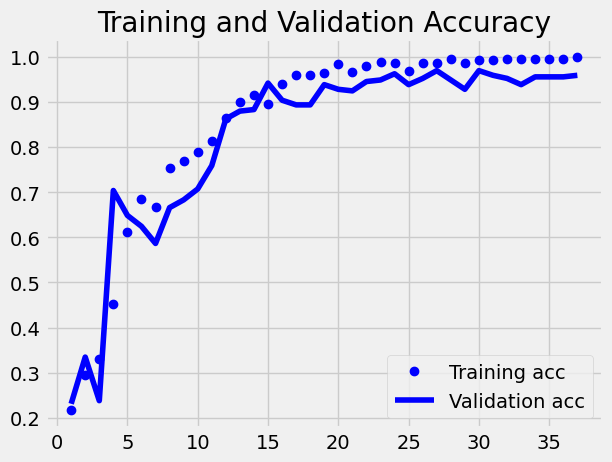

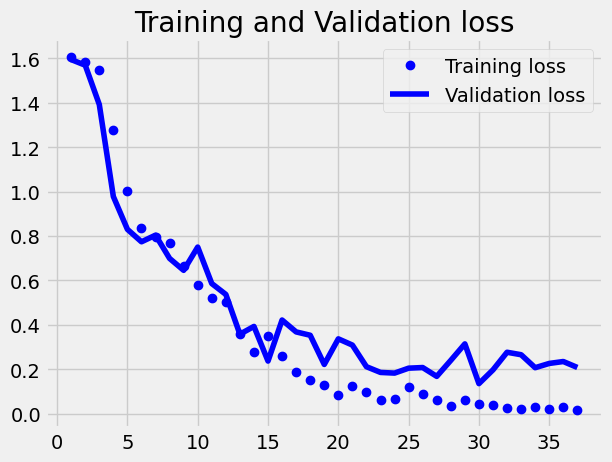

In [84]:
#import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plotting the validation and training plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### Inference

By rule of thumb we say,

Underfitting – Validation and training loss high

Overfitting – Validation loss is high, training error low

Good fit – Validation error low, slightly higher than the training error

Unknown fit - Validation error low, training loss ‘high’

From the above plot, we can conclude that the it is Good fit, as the Validation loss is low and also slightly higher than the training loss.

In [85]:
# Making  Prediction
txt = ["wales silent on grand slam talk rhys williams "]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['sport','business','politics','entertainment','tech']

# printing predicted labels
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 1s 1s/step
[[7.8664571e-03 1.2035677e-03 7.4687798e-04 9.8910308e-01 1.0801153e-03]] entertainment


#### Model 2 - Logistic Regression 

In [27]:
# Training Logistic Regression model

# importing libary
from sklearn.linear_model import LogisticRegression

# Making an instance of the Model
lr = LogisticRegression()

# fiting the model to the training data X_train_cv and y_train.
lr.fit(X_train_cv, y_train)


# transform X_test using CV
X_test_cv = cv.transform(X_test)


# generate predictions
#  generating predictions for the transformed test data X_test_cv

predictions = lr.predict(X_test_cv)

predictions

array(['politics', 'entertainment', 'business', 'business', 'business',
       'business', 'tech', 'entertainment', 'business', 'sport', 'sport',
       'politics', 'business', 'politics', 'business', 'tech', 'politics',
       'entertainment', 'tech', 'entertainment', 'sport', 'tech',
       'politics', 'sport', 'tech', 'entertainment', 'entertainment',
       'politics', 'entertainment', 'business', 'entertainment',
       'politics', 'tech', 'tech', 'entertainment', 'politics', 'sport',
       'politics', 'sport', 'politics', 'tech', 'entertainment',
       'entertainment', 'sport', 'politics', 'business', 'entertainment',
       'sport', 'business', 'politics', 'entertainment', 'sport',
       'business', 'entertainment', 'tech', 'sport', 'sport', 'sport',
       'entertainment', 'politics', 'politics', 'business', 'business',
       'politics', 'sport', 'business', 'business', 'entertainment',
       'politics', 'business', 'tech', 'entertainment', 'tech',
       'politics', 'busi

In [28]:
# importing libaries
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.9743260590500642


## Model Evaluation

Understanding how well a machine learning model will perform is the main purpose behind working with evaluation metrics. Metrics like accuracy, precision, recall will be used to evaluate classification models for our balanced datasets and help it perform better in evaluating the model performance.

In [29]:
# Predict the labels for the testing data
predictions = lr.predict(X_test_cv)

# Evaluating the model performance
report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)

Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       178
entertainment       0.97      0.99      0.98       146
     politics       0.96      0.96      0.96       137
        sport       0.98      1.00      0.99       168
         tech       0.99      0.96      0.98       150

     accuracy                           0.97       779
    macro avg       0.97      0.97      0.97       779
 weighted avg       0.97      0.97      0.97       779



#### Inference

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. We have got 0.97 precision which is good enough.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.  We have got recall of 0.97 which is good for this model as it’s above 0.5.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account, F1 is usually more useful than accuracy, especially if you have an uneven class distribution. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.97.

Hence, we can say that the model is great as it shows a high Precision rate, Recall rate and F1 Score, as such is a good performance in classifying news articles into their respective categories.

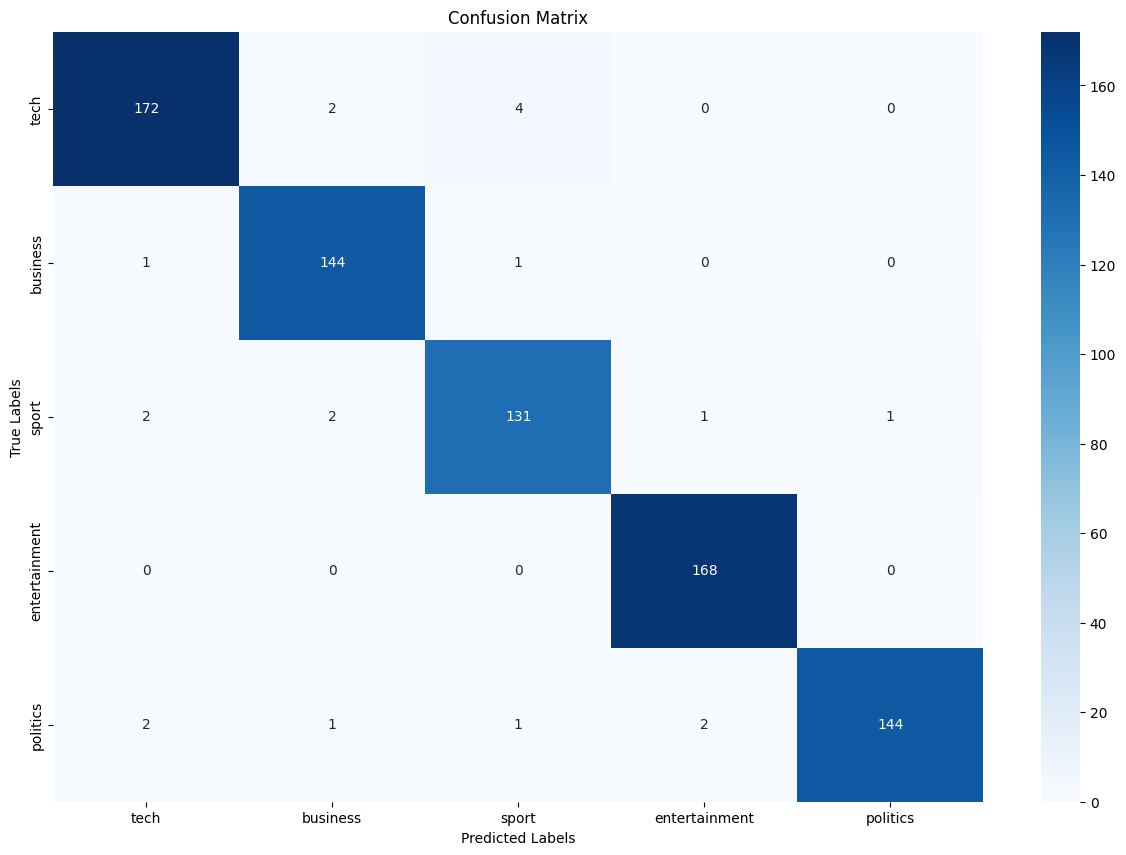

In [30]:
# confusion matrix plot

# importing confusion_matrix libary
from sklearn.metrics import confusion_matrix

categories = ['tech', 'business', 'sport', 'entertainment', 'politics']

cf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(15, 10))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Inference

Given the very high accuracy of our model, almost all the predictions end up on the diagonal (predicted label = actual label), right where we want them to be!